# Analyzing players ratings through soccer database

This is a regression problem as Players ratings(Dependent variable) is a continuous variable.

In [1]:
import pandas as pd 
import numpy as np
import sqlite3
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create your connection to soccer database
cnx = sqlite3.connect('database.sqlite')
# create a dataframe using table Player_Attributes of soccer database
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
# view header of dataframe
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
#Check the shape of the combined dataframe
df.shape

(183978, 42)

In [5]:
# view summary of dataframe
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

# Data Preprocessing

In [8]:
#Create a new dataframe after dropping some columns which are not useful to predict player overall ratings
soccer_data = df.drop(["id", "player_fifa_api_id", "player_api_id", "date"], axis = 1)

#Check whether there are duplicates entries present or not
soccer_data.duplicated().any()

True

In [9]:
#Drop duplicates entries from soccer_data dataframe
soccer_data.drop_duplicates(inplace=True)

#check dataframe shape after dropping duplicate entries
soccer_data.shape

(138440, 38)

In [10]:
#check number of missing parameters in the DataFrame - Columnwise
soccer_data.isnull().values.sum()

12216

In [12]:
# functions to handle missing data
def data_preprocessing(df):
    df.infer_objects()
    df.fillna(-99999, inplace=True)     
    return df

#call function to hanbdle missing data
data_preprocessing(soccer_data)

#check number of missing parameters in the DataFrame - Columnwise after handling missing data (should be 0)
soccer_data.isnull().values.sum()

0

In [13]:
#Converting Categorical data into numeric
soccer_data = pd.get_dummies(soccer_data)
soccer_data.head(1)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# view shape of the new data frame
soccer_data.shape

(138440, 67)

In [15]:
soccer_data.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
count,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,...,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000,138440.000000
mean,68.572233,73.274061,54.801914,49.471641,57.050195,62.239367,-1021.132274,58.760712,-1017.740393,49.060488,...,0.000845,0.013081,0.000621,0.000730,0.154226,0.099191,0.707563,0.009715,0.002124,0.000506
std,269.033885,269.038823,269.475747,269.585690,269.438570,269.309300,10296.052731,269.519877,10296.405470,269.500618,...,0.029059,0.113624,0.024916,0.027001,0.361166,0.298919,0.454884,0.098087,0.046034,0.022481
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,69.000000,46.000000,34.000000,50.000000,58.000000,35.000000,52.000000,41.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,74.000000,60.000000,53.000000,60.000000,66.000000,53.000000,64.000000,56.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,74.000000,78.000000,68.000000,66.000000,69.000000,72.000000,64.000000,72.000000,67.000000,64.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


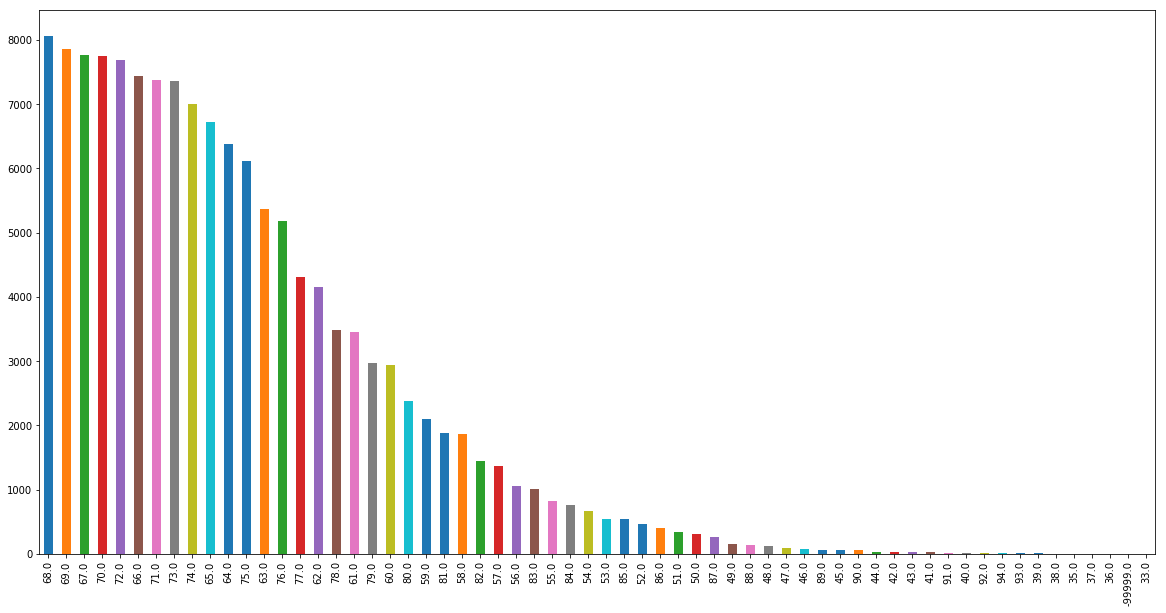

In [16]:
#Visualize column overall_rating of the dataframe
soccer_data['overall_rating'].value_counts()

soccer_data['overall_rating'].value_counts().plot(kind='bar',figsize=(20,10))

In [17]:
#Split dataframe into df_x and df_y
df_x = soccer_data.drop(['overall_rating'], 1)
df_y = np.array(soccer_data['overall_rating'])

In [18]:
from sklearn.ensemble import RandomForestRegressor

#Use RandomForestRegressor to check feature_importances
rfc_1 = RandomForestRegressor(random_state=10)
rfc_1.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc_1.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

In [19]:
print(feature_importances[:35])

                        importance
feature                           
gk_kicking                  0.2001
ball_control                0.1055
positioning                 0.1012
crossing                    0.1008
dribbling                   0.1007
strength                    0.1006
long_passing                0.1003
penalties                   0.1002
reactions                   0.0480
potential                   0.0244
standing_tackle             0.0044
gk_diving                   0.0025
heading_accuracy            0.0018
gk_positioning              0.0014
marking                     0.0011
shot_power                  0.0007
interceptions               0.0007
finishing                   0.0007
gk_handling                 0.0006
stamina                     0.0005
short_passing               0.0005
aggression                  0.0004
sliding_tackle              0.0003
gk_reflexes                 0.0003
sprint_speed                0.0003
acceleration                0.0003
long_shots          

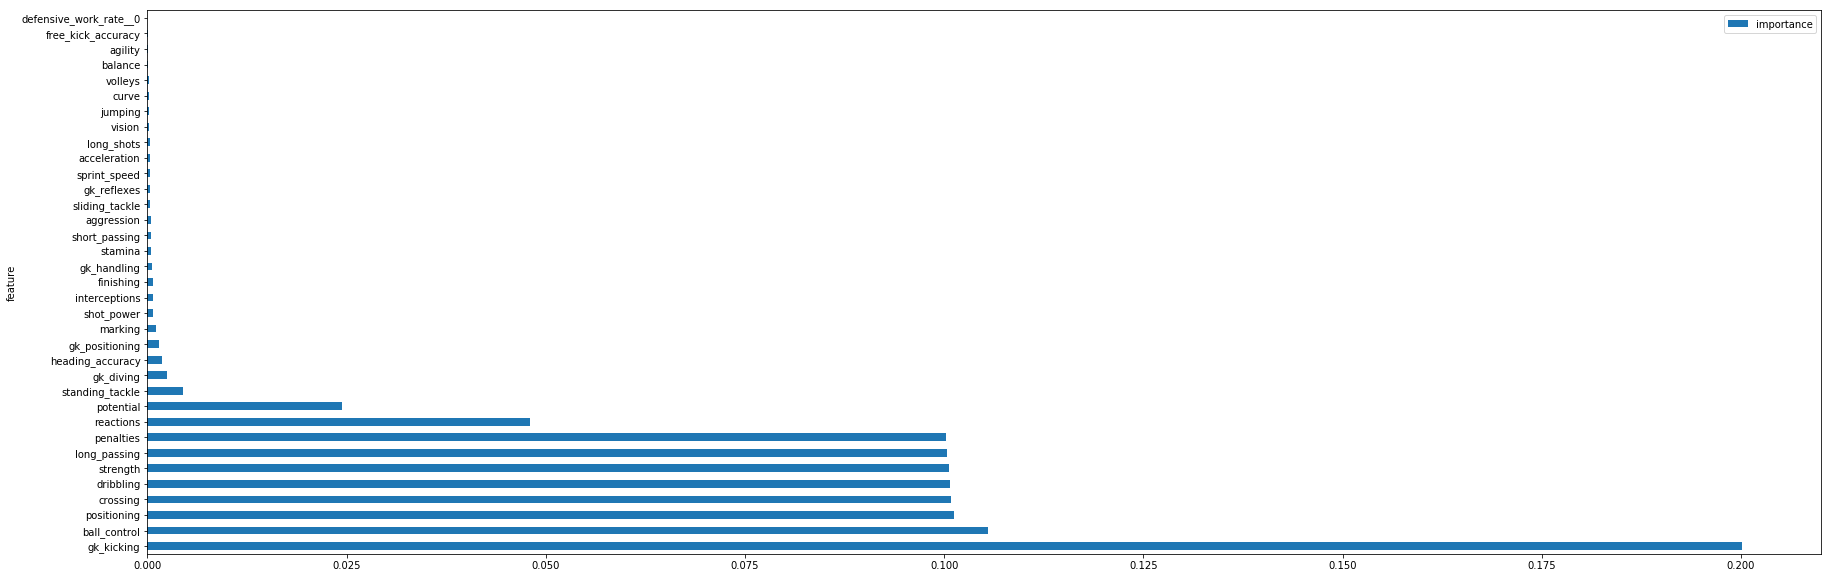

In [20]:
#Visualize top 35 features of the dataframe
feature_importances[:35].plot(kind='barh',figsize=(30,10))

# Create dataset for train, test and cross-validation

In [21]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=0.2,train_size=0.8, random_state = 55)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.20,train_size =0.80, random_state = 55)

In [22]:
#Apply scaling on dataframe df_x

from sklearn.preprocessing import StandardScaler, Normalizer, scale
df_x1 = scale(x_train)

In [23]:
#Perfrom PCA (dimensionality reduction technique) on scaled dataframe

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
# on non-standardized data

pca = PCA(n_components=10).fit(x_train)

#df_x1 = PCA(n_components=10).fit_transform(df_x)

In [24]:
pca.explained_variance_ratio_

array([9.95931236e-01, 4.05907903e-03, 4.00807495e-06, 2.66323964e-06,
       4.99954694e-07, 4.50403141e-07, 3.10802167e-07, 1.59299866e-07,
       1.46754745e-07, 1.34132405e-07])

In [25]:
from sklearn.decomposition import PCA

# on non-standardized data
df_x2 = pca.transform(x_train)

In [26]:
#Map test and cross-validation data using PCA
pca.transform(x_test)

array([[-2.87192060e+03, -1.92067190e+01,  3.89076836e+01, ...,
         6.20565200e+00, -1.01604641e+01, -5.81671121e+00],
       [-2.89619899e+03, -6.34315217e+01,  5.30239844e+01, ...,
         1.30463780e+00,  1.29627701e+00,  5.53260406e+00],
       [-2.87306907e+03, -3.17066450e+01,  4.70829204e+00, ...,
         8.79318181e+00,  2.12654850e+01, -8.41204415e+00],
       ...,
       [-2.83820880e+03,  1.44159285e+01,  4.12943665e+00, ...,
        -8.38867380e+00, -2.45831993e+00,  1.36748970e+01],
       [-2.85937492e+03,  1.61889579e+01,  2.10812016e+01, ...,
        -3.47804386e+00,  2.22635971e+00, -2.50457040e-02],
       [-2.86085153e+03,  3.16000975e+01, -1.43481382e+01, ...,
        -3.21556754e+00,  5.76824593e-01,  1.76118212e+01]])

In [27]:
pca.transform(x_cv)

array([[-2.86550213e+03, -2.36490022e+01,  3.58075801e+01, ...,
         8.39982744e+00, -2.02588703e+01,  1.01841086e+01],
       [-2.88745714e+03, -3.82369466e+01,  5.61209828e+01, ...,
         2.77721371e+00,  1.39288101e+00, -1.18653964e+00],
       [-2.86278379e+03,  1.27256133e+01,  3.31684824e+01, ...,
        -1.03475806e+01,  1.10354476e+01, -6.76281382e+00],
       ...,
       [-2.82721273e+03,  3.03752174e+01, -1.53034510e+01, ...,
         1.12146985e+01, -1.76057259e+01,  7.89432947e-01],
       [-2.85108762e+03,  3.27578488e+00,  2.37339483e+01, ...,
         9.73719262e+00, -9.14673786e+00, -8.21825096e+00],
       [-2.86435492e+03, -1.72957529e+01,  2.69151537e+01, ...,
         7.98178319e+00,  1.10351876e+01,  9.96829690e+00]])

# Apply Model (Linear regression, Decision tree, Random forest and xgboost)

In [29]:
#Apply linear regression model on the dataset

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr1 = LinearRegression()
lr = RFE(lr1, 20)
lr.fit(x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=20, step=1, verbose=0)

In [30]:
#Apply decision tree model on the dataset

from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor(min_samples_split=10, random_state=55)
d_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=55, splitter='best')

In [31]:
#Apply Random Forest model on the dataset

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state=99)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

In [32]:
# Apply xgboost model on the dataset

import xgboost as xgb
Boosting = xgb.XGBRegressor(n_estimators=200,learning_rate=1)
Boosting.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Analyze mse(mean squared error) and accuracy

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['linear_regression','decision_tree','random_forest','xgboost'])

In [36]:
models.loc['train_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_train), y_true=y_train)
models.loc['cv_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_cv), y_true=y_cv)
models.loc['test_mse','linear_regression'] = mean_squared_error(y_pred=lr.predict(x_test), y_true=y_test)
models.loc['accuracy_score','linear_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

In [37]:
models.loc['train_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

In [38]:
models.loc['train_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_train), y_true=y_train)
models.loc['cv_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

In [39]:
models.loc['train_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_train), y_true=y_train)
models.loc['cv_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_cv), y_true=y_cv)
models.loc['test_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=Boosting.predict(x_test).round(), y_true=y_test)

In [40]:
models

,linear_regression,decision_tree,random_forest,xgboost
train_mse,112965,0.389921,28241.1,1.63189
cv_mse,144.617,3.20427,1.69886,1.94032
test_mse,132.1,3.09212,1.60405,1.87933
accuracy_score,0.0567755,0.439613,0.503828,0.342531


As observed from above table, random forest model is providing highest accuracy and lowest mean squared error. So Random forest is best model to predict players rating.